# NOTEBOOK DI PLOT

## PLOT RELATIVI AL DATASET

In [1]:
########### IMPORT DELLE LIBRERIE
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
import re

In [2]:
################ da cambiare qui per un eventuale visualizzazione di un altro dataset
with open('/kaggle/input/dataset-ml/inat2018_train_dedup_inter_intra.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [3]:
type(dataset[0])

numpy.ndarray

In [4]:
# Costruzione del dataframe cosi da semplificare i plot
df = pd.DataFrame({
    'features': list(dataset[0]), 
    'label': dataset[1]
})

print(df.head())

                                            features  label
0  [0.05588546022772789, 0.005290650296956301, -0...      0
1  [-0.014053504914045334, 0.01117969024926424, -...      0
2  [0.034671809524297714, -0.039325762540102005, ...      0
3  [0.07343461364507675, -0.024001555517315865, -...      0
4  [0.10726998001337051, 0.004342303145676851, -0...      0


In [5]:
df.iloc[0]['features'].shape

(512,)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324418 entries, 0 to 324417
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   features  324418 non-null  object
 1   label     324418 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.0+ MB


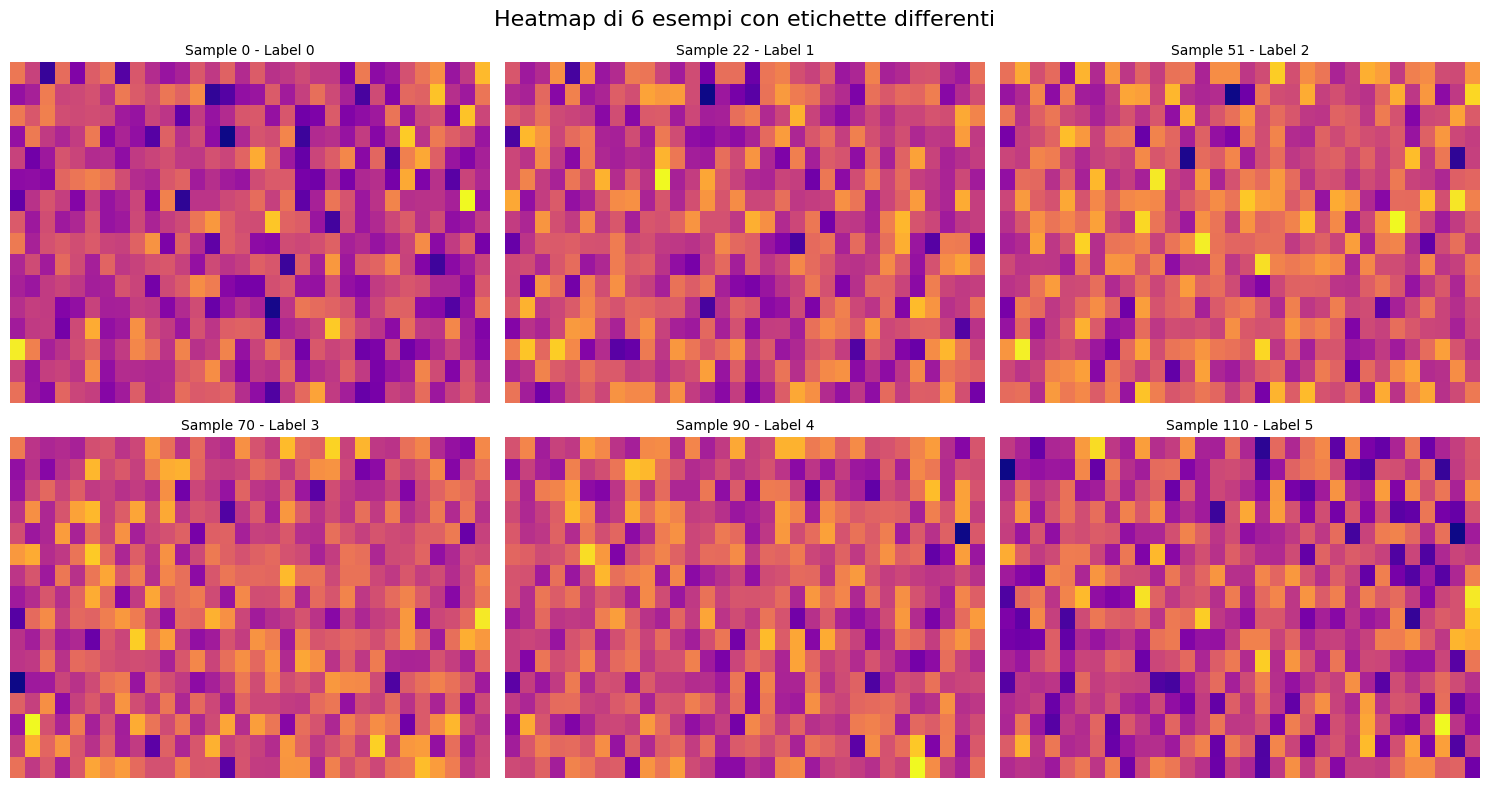

In [7]:
################## HEATMAP DI 6 CLASSI DIVERS
unique_labels = []
selected_indices = []

for idx, label in enumerate(dataset[1]):
    if label not in unique_labels:
        unique_labels.append(label)
        selected_indices.append(idx)
    if len(unique_labels) == 6:
        break

fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 righe x 3 colonne

for plot_idx, data_idx in enumerate(selected_indices):
    feature_vector = dataset[0][data_idx]
    label = dataset[1][data_idx]

    heatmap_data = np.reshape(feature_vector, (16, 32))

    ax = axes[plot_idx // 3, plot_idx % 3]
    sns.heatmap(heatmap_data,
                cmap='plasma',
                cbar=False,
                xticklabels=False,
                yticklabels=False,
                ax=ax)

    ax.set_title(f"Sample {data_idx} - Label {label}", fontsize=10)
    ax.axis('off')

plt.suptitle("Heatmap di 6 esempi con etichette differenti", fontsize=16)
plt.savefig('heatmap_plot.png', dpi=300)
plt.tight_layout()
plt.show()

Numero di componenti che spiegano il 90% della varianza: 153
Varianza spiegata totale: 0.9002


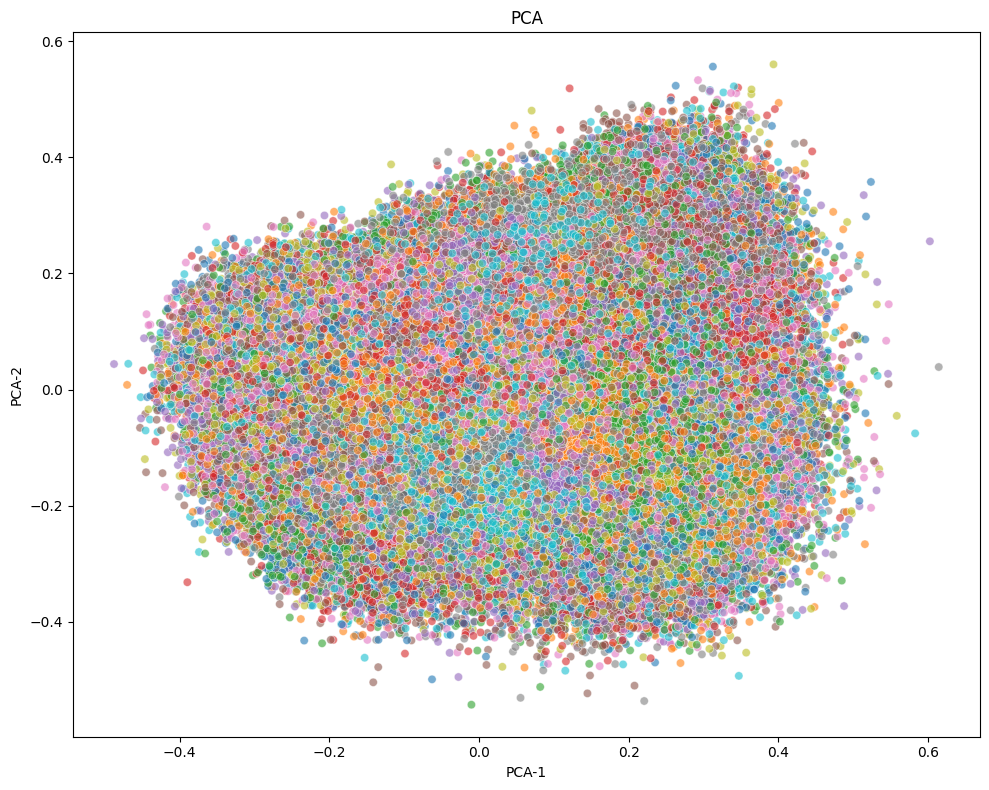

In [8]:
################### PCA PER IL PLOT [CON 90% DELLA VARIANZA]
X = np.stack(df['features'].values)
y = df['label'].values

pca_full = PCA(n_components=0.90)
X_reduced = pca_full.fit_transform(X)

print(f"Numero di componenti che spiegano il 90% della varianza: {pca_full.n_components_}")
print(f"Varianza spiegata totale: {np.sum(pca_full.explained_variance_ratio_):.4f}")

pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X)

df_vis = pd.DataFrame({
    "PCA-1": X_vis[:, 0],
    "PCA-2": X_vis[:, 1],
    "label": y
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PCA-1", y="PCA-2",
    hue="label",
    palette="tab10",
    data=df_vis,
    legend=False,
    alpha=0.6
)
plt.title("PCA")
plt.savefig('pca_plot.png', dpi=300)
plt.tight_layout()
plt.show()

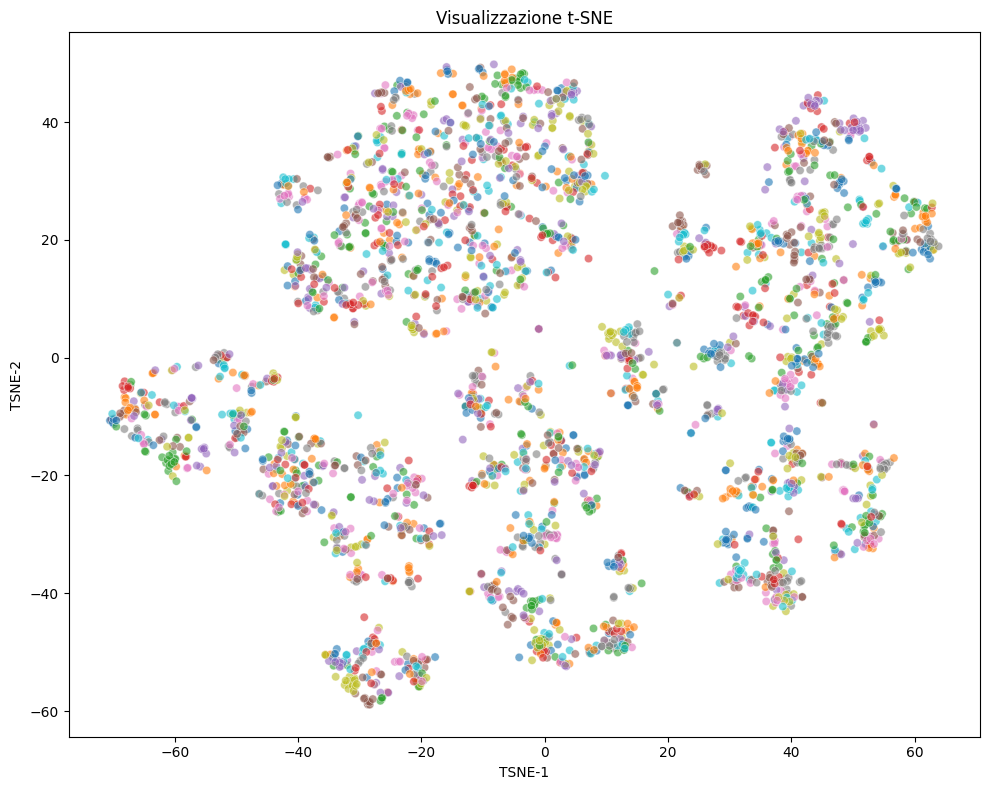

In [9]:
######################## PLOT CON t-NSE PER LA VISUALIZZAZIONE
# Campionamento per velocizzare il t-SNE e migliorare leggibilità del plot
df_sampled = df.sample(n=3000, random_state=33)

X_sampled = np.stack(df_sampled['features'].values)
y_sampled = df_sampled['label'].values

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

df_tsne = pd.DataFrame({
    'TSNE-1': X_tsne[:, 0],
    'TSNE-2': X_tsne[:, 1],
    'label': y_sampled
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE-1', y='TSNE-2',
    hue='label',
    palette='tab10',
    data=df_tsne,
    legend=False,
    alpha=0.6
)
plt.title('Visualizzazione t-SNE')
plt.savefig('tsne_plot.png', dpi=300)
plt.tight_layout()
plt.show()

## PLOT RELATIVI AGLI ESPERIMENTI

### Train ed Eval senza alcuna modifica all'architettura

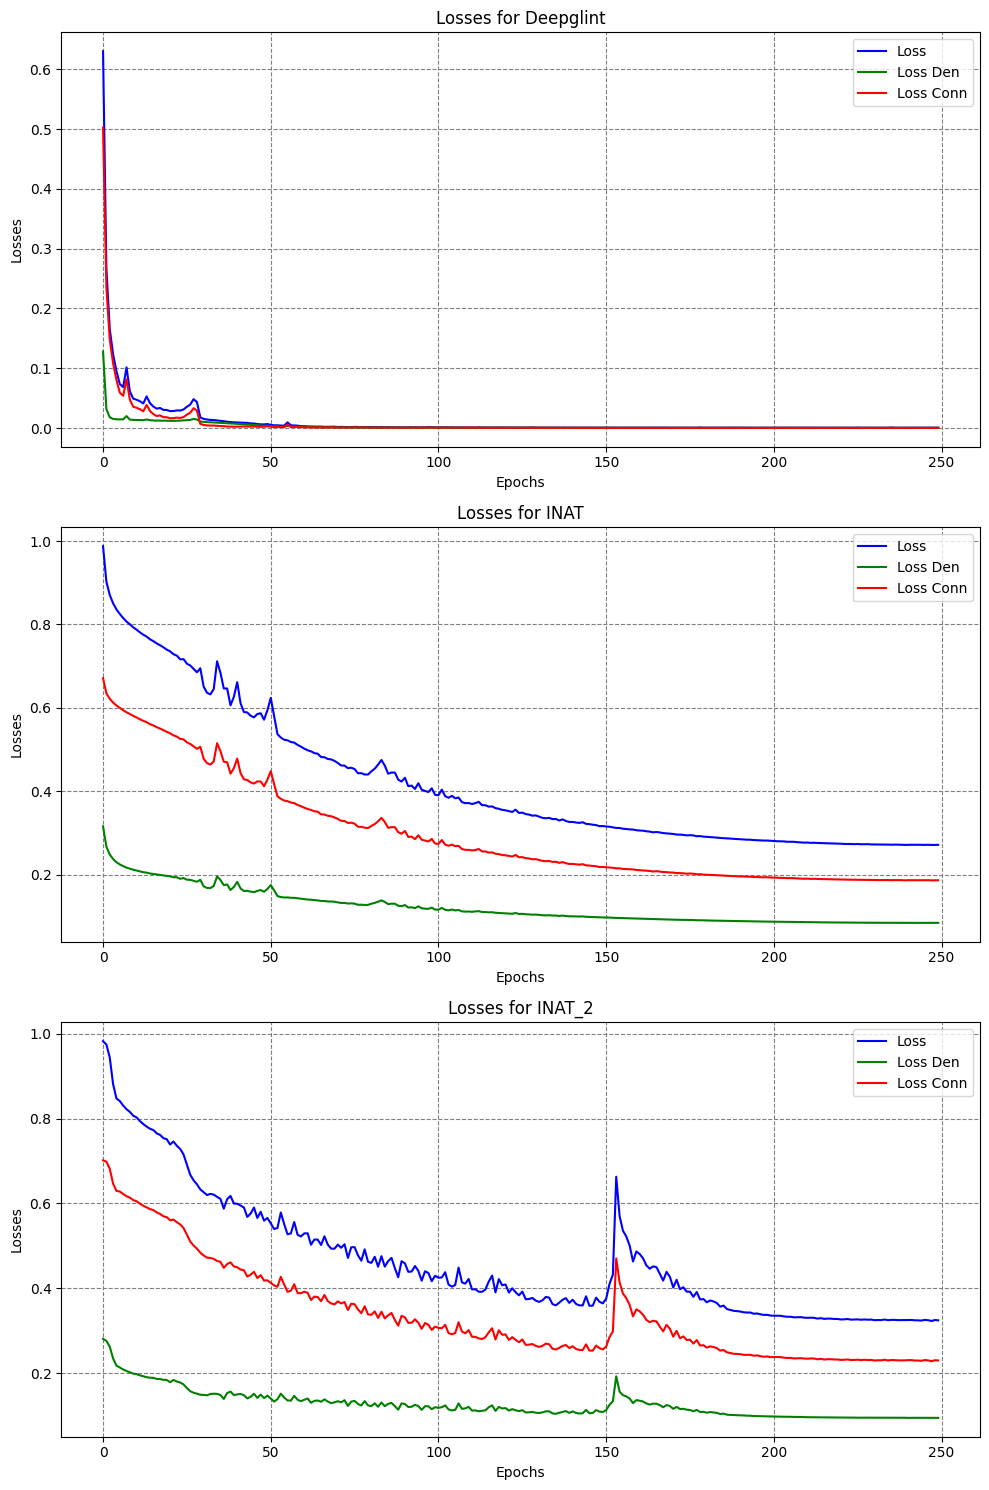

In [10]:
dataset_folders = ['Deepglint', 'INAT', 'INAT_2']
csv_files = ['/kaggle/input/mlreplica/og/deepglint/losses.csv', '/kaggle/input/mlreplica/og/inat2018_1/losses.csv', '/kaggle/input/mlreplica/og/inat_2/losses.csv']

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses for {folder}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

plt.savefig('losses_plot_no_mod.png', dpi=300)
plt.tight_layout()
plt.show()


## Modifica 1

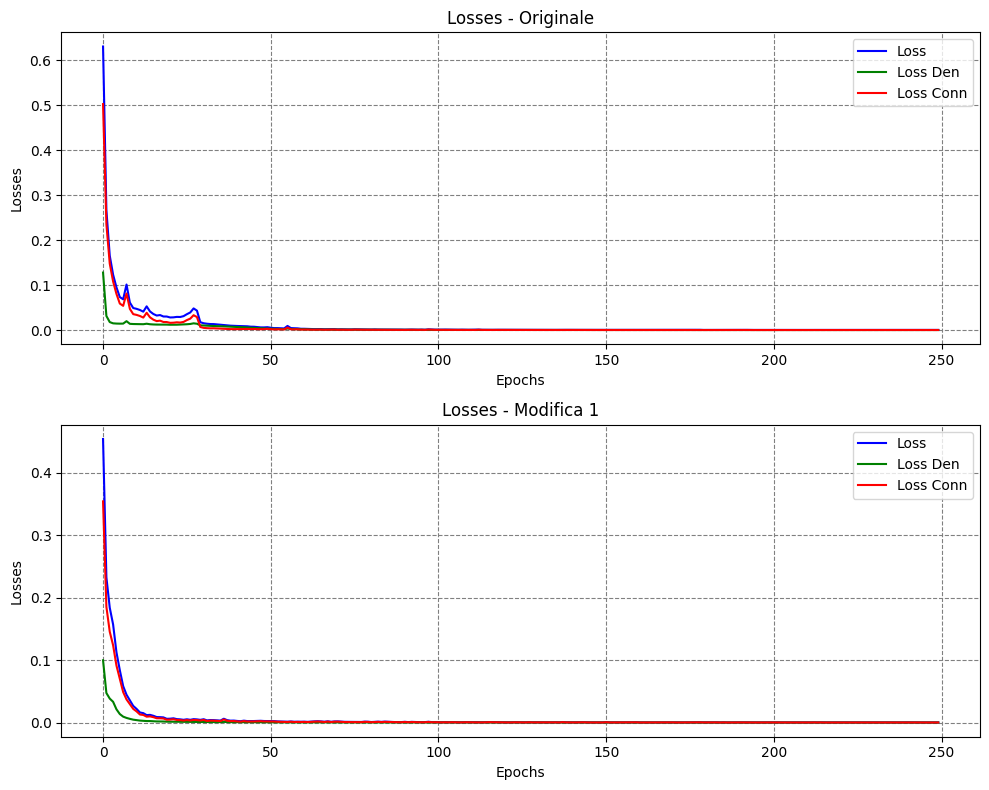

In [11]:
dataset_folders = ["Originale",'Modifica 1']
csv_files = ['/kaggle/input/mlreplica/og/deepglint/losses.csv','/kaggle/input/mlmodifica1/1mod/losses.csv']

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses - {folder}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

plt.subplots_adjust(hspace=0.5)

plt.savefig('losses_plot_mod_1.png', dpi=300)
plt.tight_layout()
plt.show()

## MODIFICA 2

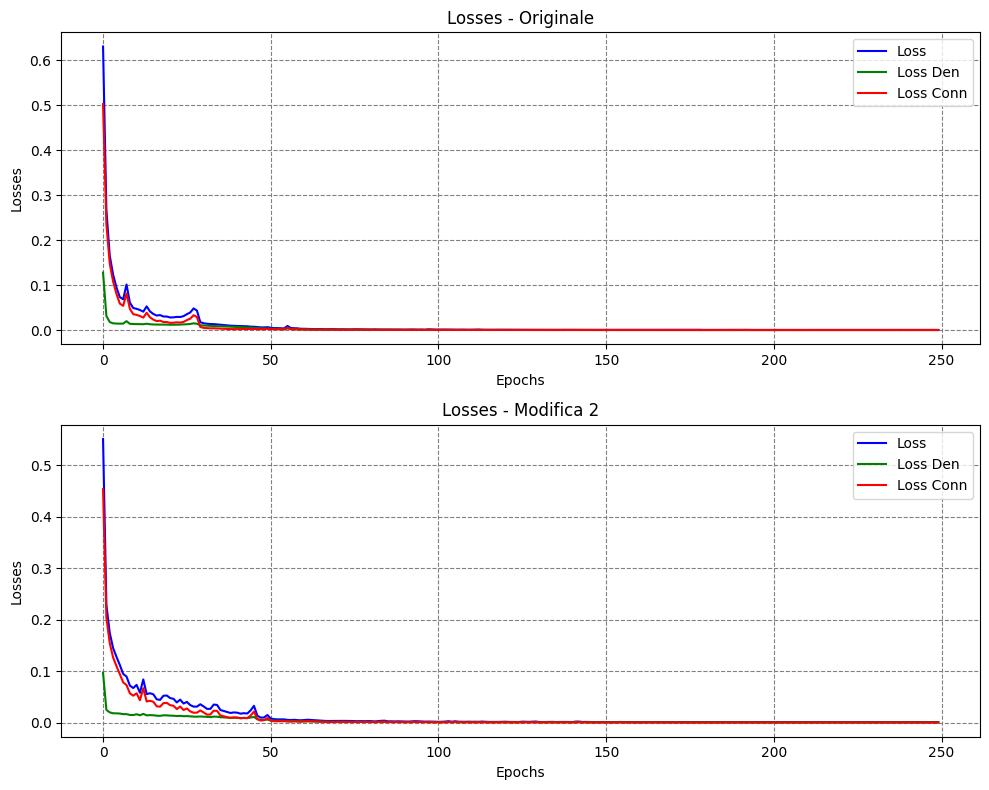

In [12]:
dataset_folders = ["Originale",'Modifica 2']
csv_files = ['/kaggle/input/mlreplica/og/deepglint/losses.csv','/kaggle/input/mlmod2/2mod/losses.csv']

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses - {folder}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

# Aggiungi più spazio tra i subplot
plt.subplots_adjust(hspace=0.5)

plt.savefig('losses_plot_mod_2.png', dpi=300)
plt.tight_layout()
plt.show()

## MODIFICA 3


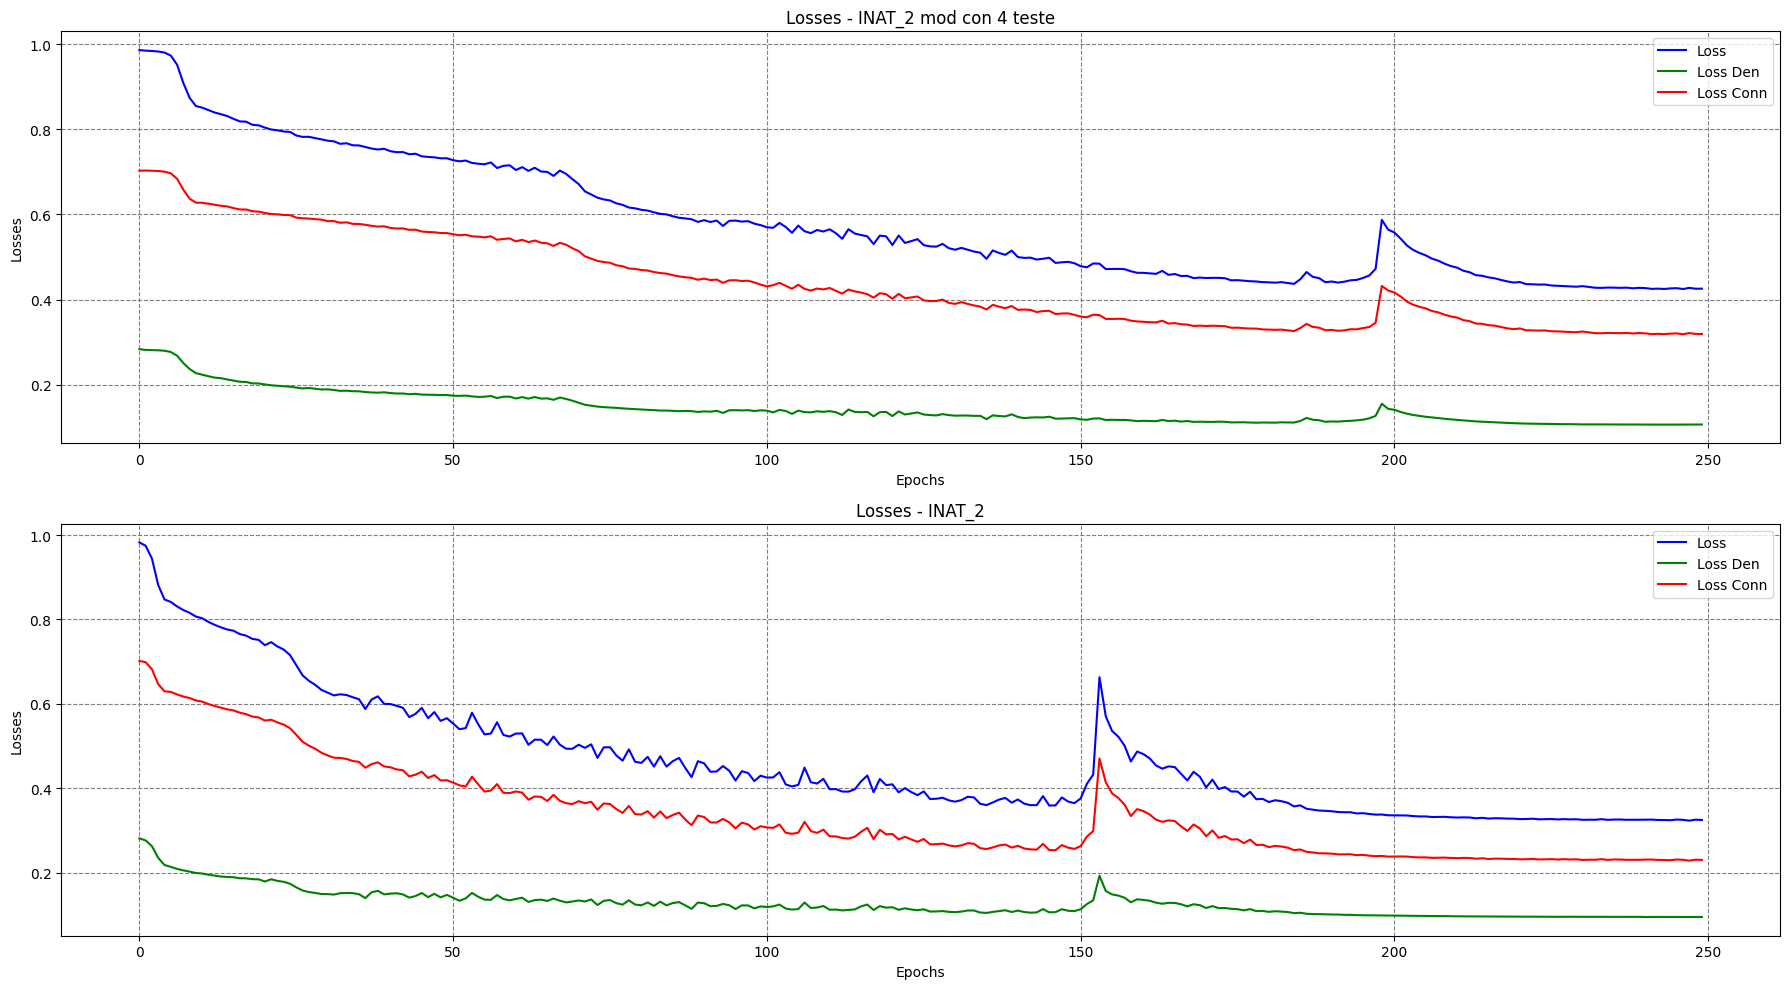

In [13]:
dataset_folders = ['INAT_2 mod con 4 teste', 'INAT_2']
csv_files = ['/kaggle/input/mod3gat/3mod/losses.csv','/kaggle/input/mlreplica/og/inat_2/losses.csv']

fig, axes = plt.subplots(2, 1, figsize=(18, 10))

axes = axes.flatten()

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses - {folder}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.savefig('losses_plot_mod_3_2columns.png', dpi=300)
plt.tight_layout()
plt.show()

## MODIFICA 4

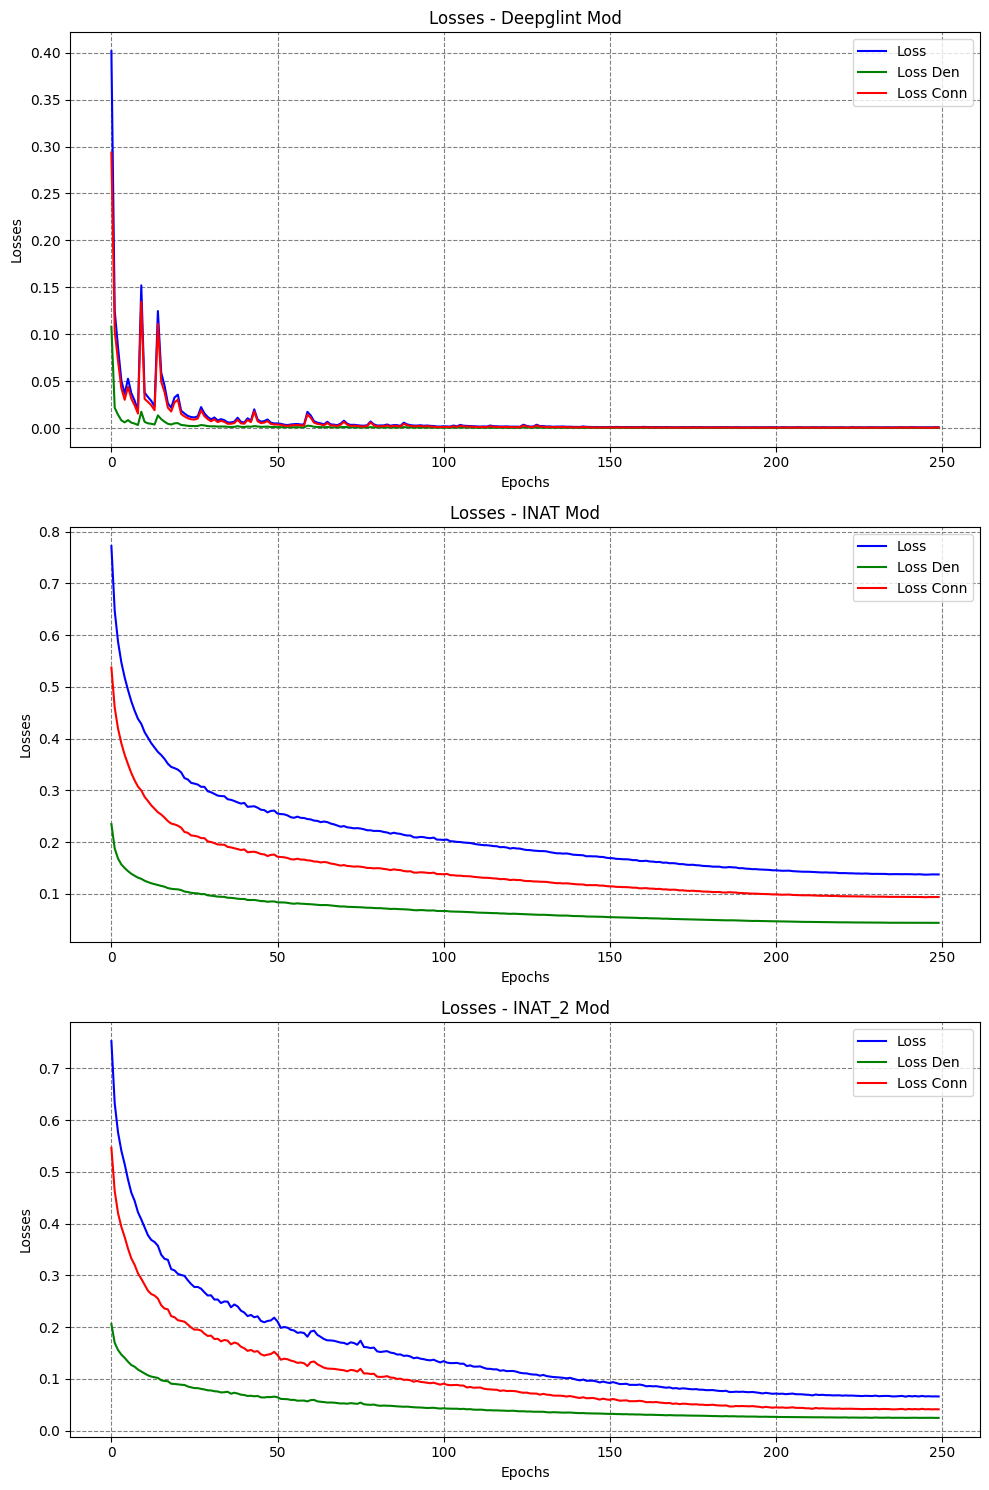

In [14]:
dataset_folders = ['Deepglint Mod', 'INAT Mod', 'INAT_2 Mod']
csv_files = ['/kaggle/input/mlmod4/4mod/deepglint/losses.csv','/kaggle/input/mlmod4/4mod/inat_full/losses.csv',"/kaggle/input/mlmod4/4mod/inat_piccolo/losses.csv"]

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses - {folder}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

plt.subplots_adjust(hspace=0.5)

plt.savefig('losses_plot_mod_4.png', dpi=300)
plt.tight_layout()
plt.show()

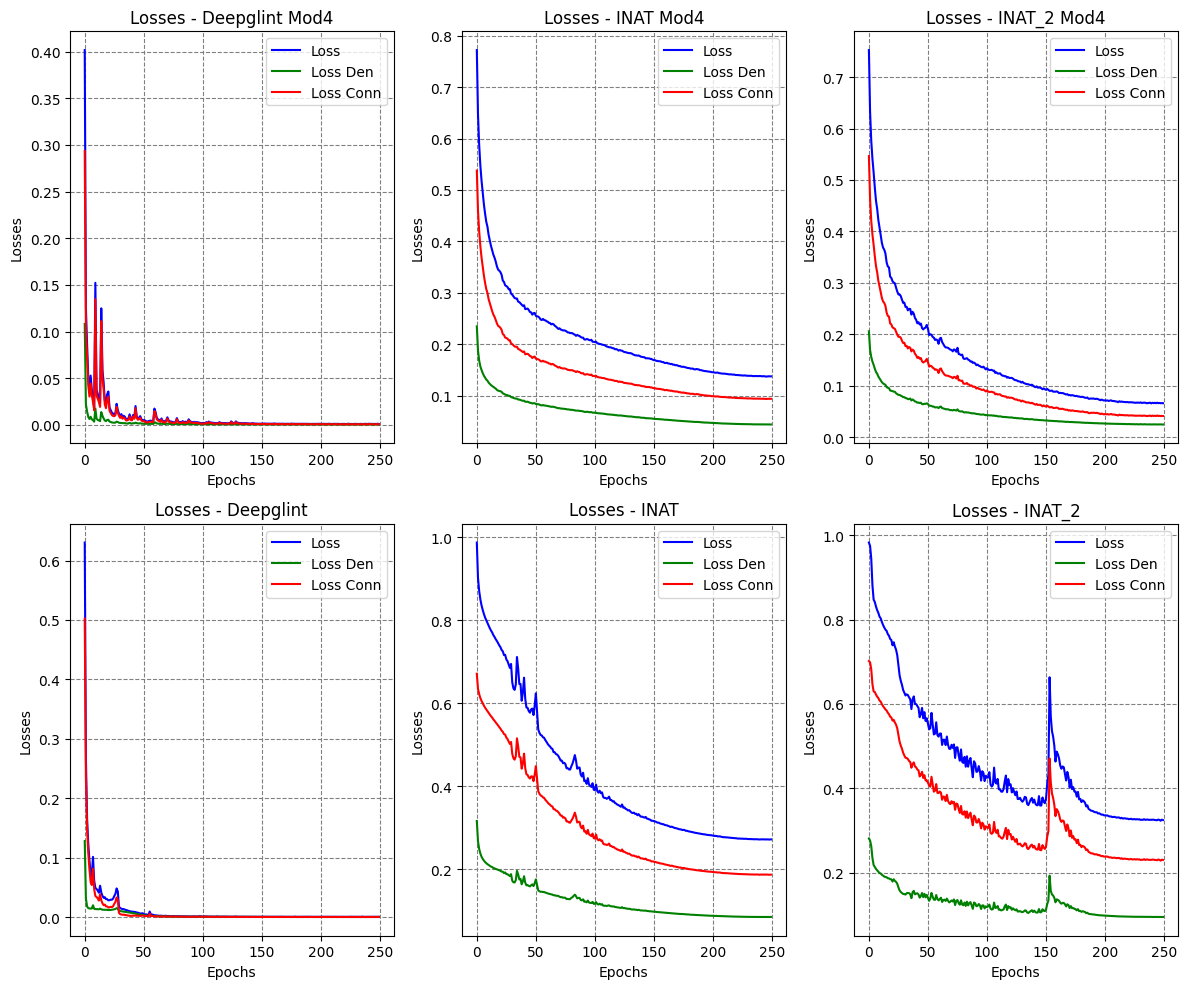

In [15]:
dataset_folders = ['Deepglint Mod4', 'INAT Mod4', 'INAT_2 Mod4','Deepglint', 'INAT', 'INAT_2']
csv_files = ['/kaggle/input/mlmod4/4mod/deepglint/losses.csv','/kaggle/input/mlmod4/4mod/inat_full/losses.csv',"/kaggle/input/mlmod4/4mod/inat_piccolo/losses.csv",'/kaggle/input/mlreplica/og/deepglint/losses.csv', '/kaggle/input/mlreplica/og/inat2018_1/losses.csv', '/kaggle/input/mlreplica/og/inat_2/losses.csv']

fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses - {folder}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.savefig('losses_plot_mod_4_2columns.png', dpi=300)
plt.tight_layout()
plt.show()

## MODIFICA 5

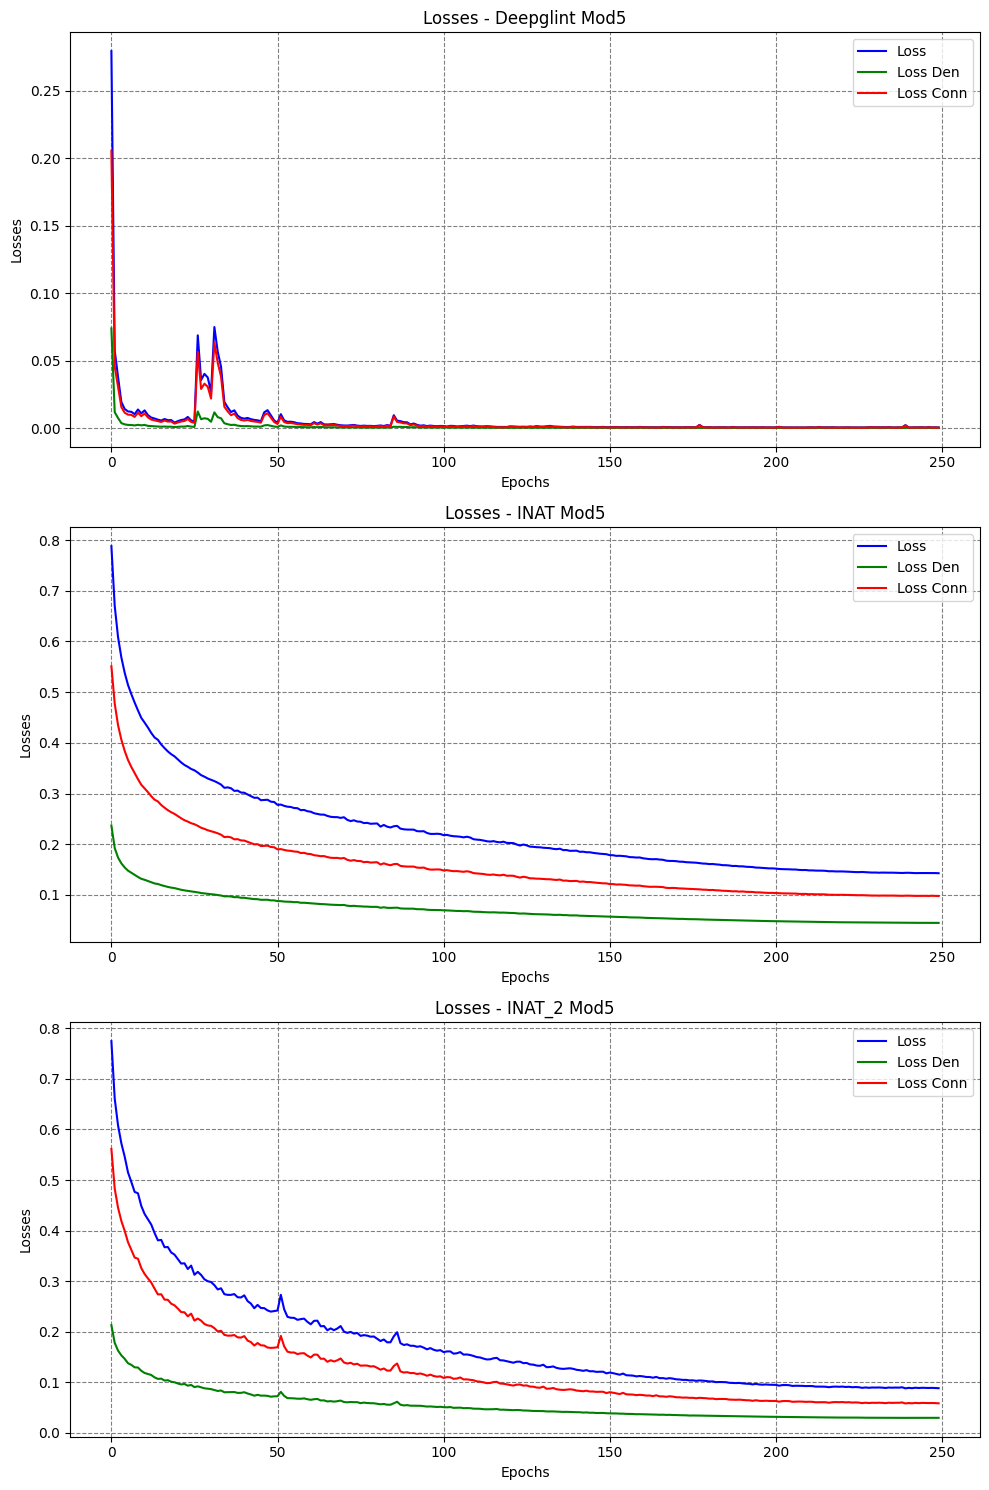

In [16]:
dataset_folders = ['Deepglint', 'INAT', 'INAT_2']
csv_files = ['/kaggle/input/mlmod6/5mod/deepglit/losses.csv','/kaggle/input/mlmod6/5mod/inat_full/losses.csv',"/kaggle/input/mlmod6/5mod/inat_piccolo/losses.csv"]

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses - {folder} Mod5")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

plt.subplots_adjust(hspace=0.5)

plt.savefig('losses_plot_mod_5.png', dpi=300)
plt.tight_layout()
plt.show()

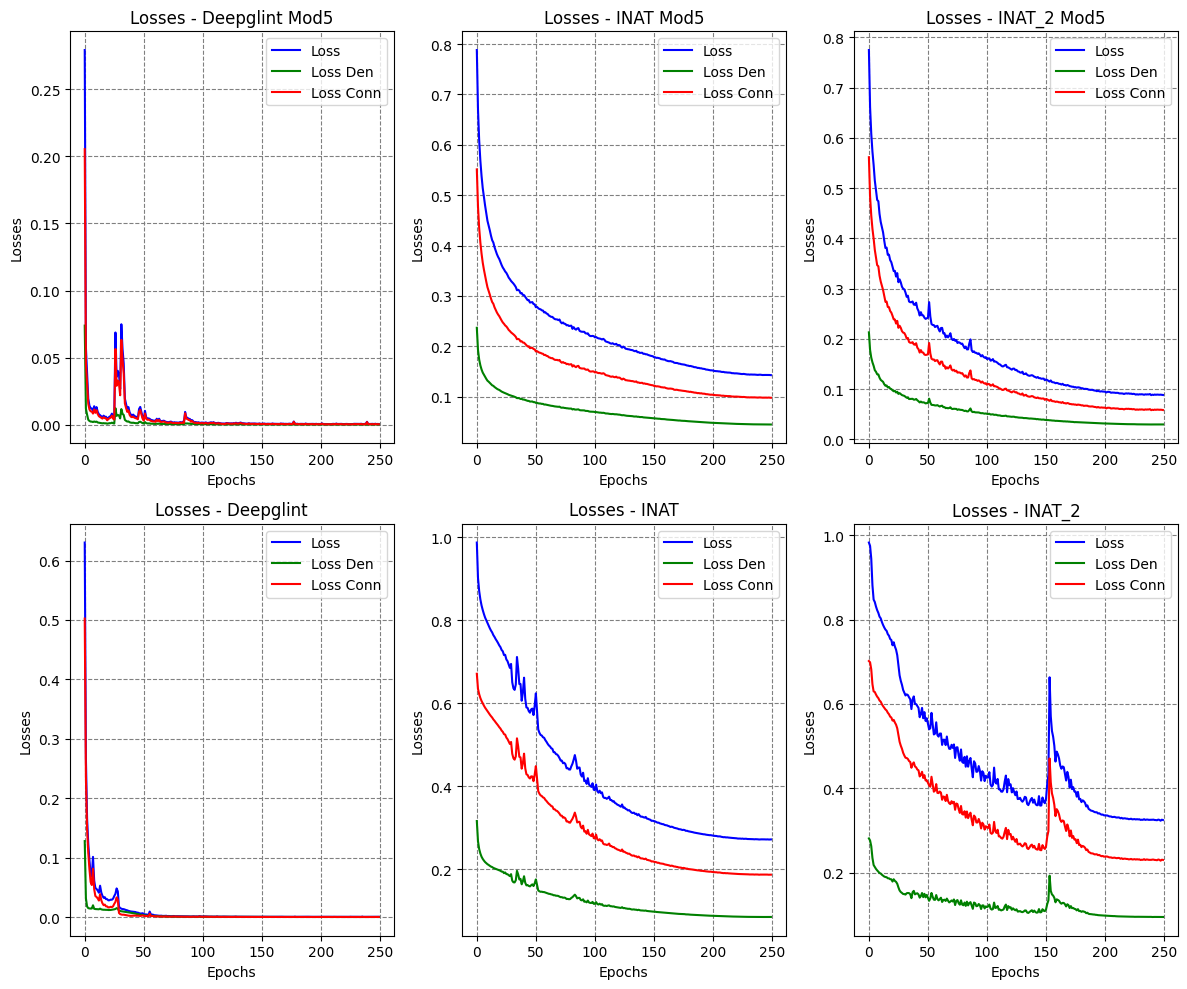

In [17]:
dataset_folders = ['Deepglint Mod5', 'INAT Mod5', 'INAT_2 Mod5','Deepglint', 'INAT', 'INAT_2']
csv_files = ['/kaggle/input/mlmod6/5mod/deepglit/losses.csv','/kaggle/input/mlmod6/5mod/inat_full/losses.csv',"/kaggle/input/mlmod6/5mod/inat_piccolo/losses.csv",'/kaggle/input/mlreplica/og/deepglint/losses.csv', '/kaggle/input/mlreplica/og/inat2018_1/losses.csv', '/kaggle/input/mlreplica/og/inat_2/losses.csv']

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

axes = axes.flatten()

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses - {folder}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.savefig('losses_plot_mod_5_2columns.png', dpi=300)
plt.tight_layout()
plt.show()

## MODIFICA 6

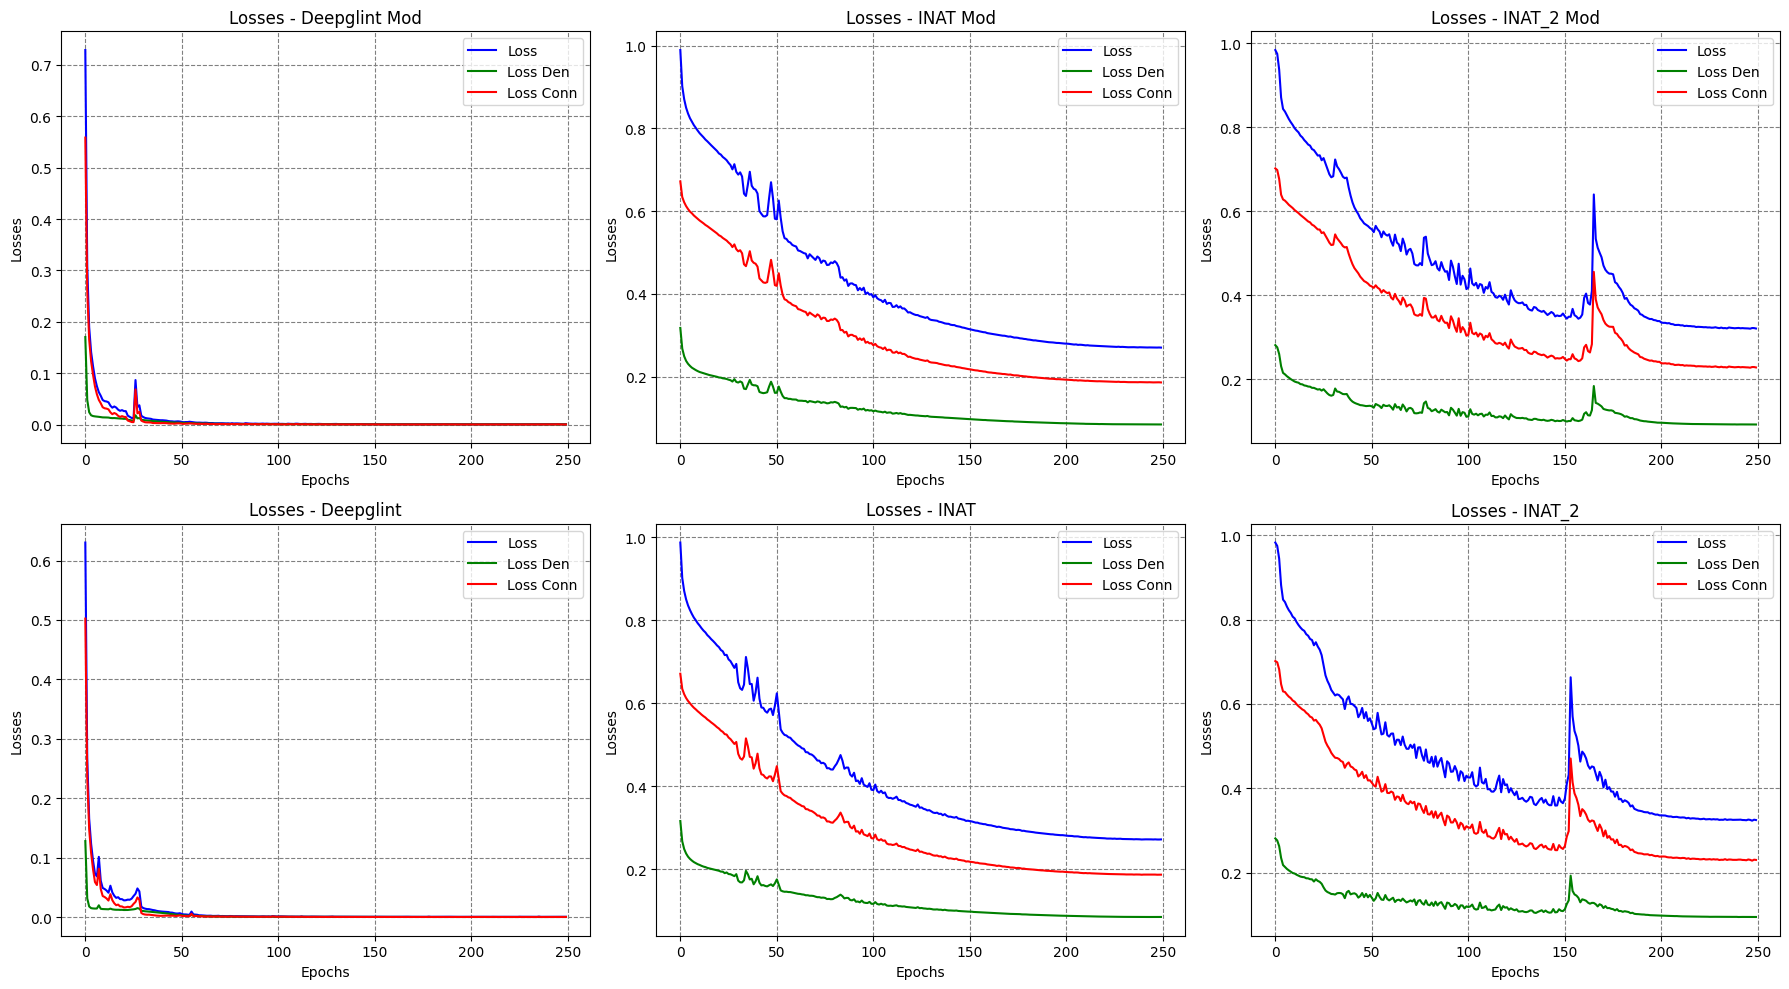

In [18]:
dataset_folders = ['Deepglint Mod', 'INAT Mod', 'INAT_2 Mod','Deepglint', 'INAT', 'INAT_2']
csv_files = ['/kaggle/input/mlmod6-1/6mod/deepglit/losses.csv','/kaggle/input/mlmod6-1/6mod/inat_full/losses.csv',"/kaggle/input/mlmod6-1/6mod/inat_piccolo/losses.csv",'/kaggle/input/mlreplica/og/deepglint/losses.csv', '/kaggle/input/mlreplica/og/inat2018_1/losses.csv', '/kaggle/input/mlreplica/og/inat_2/losses.csv']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for i, (folder, file) in enumerate(zip(dataset_folders, csv_files)):
    df = pd.read_csv(file)
    
    axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
    axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
    axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

    axes[i].set_title(f"Losses - {folder}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Losses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', color='gray')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.savefig('losses_plot_mod_6_2columns.png', dpi=300)
plt.tight_layout()
plt.show()

## MODIFICA 7

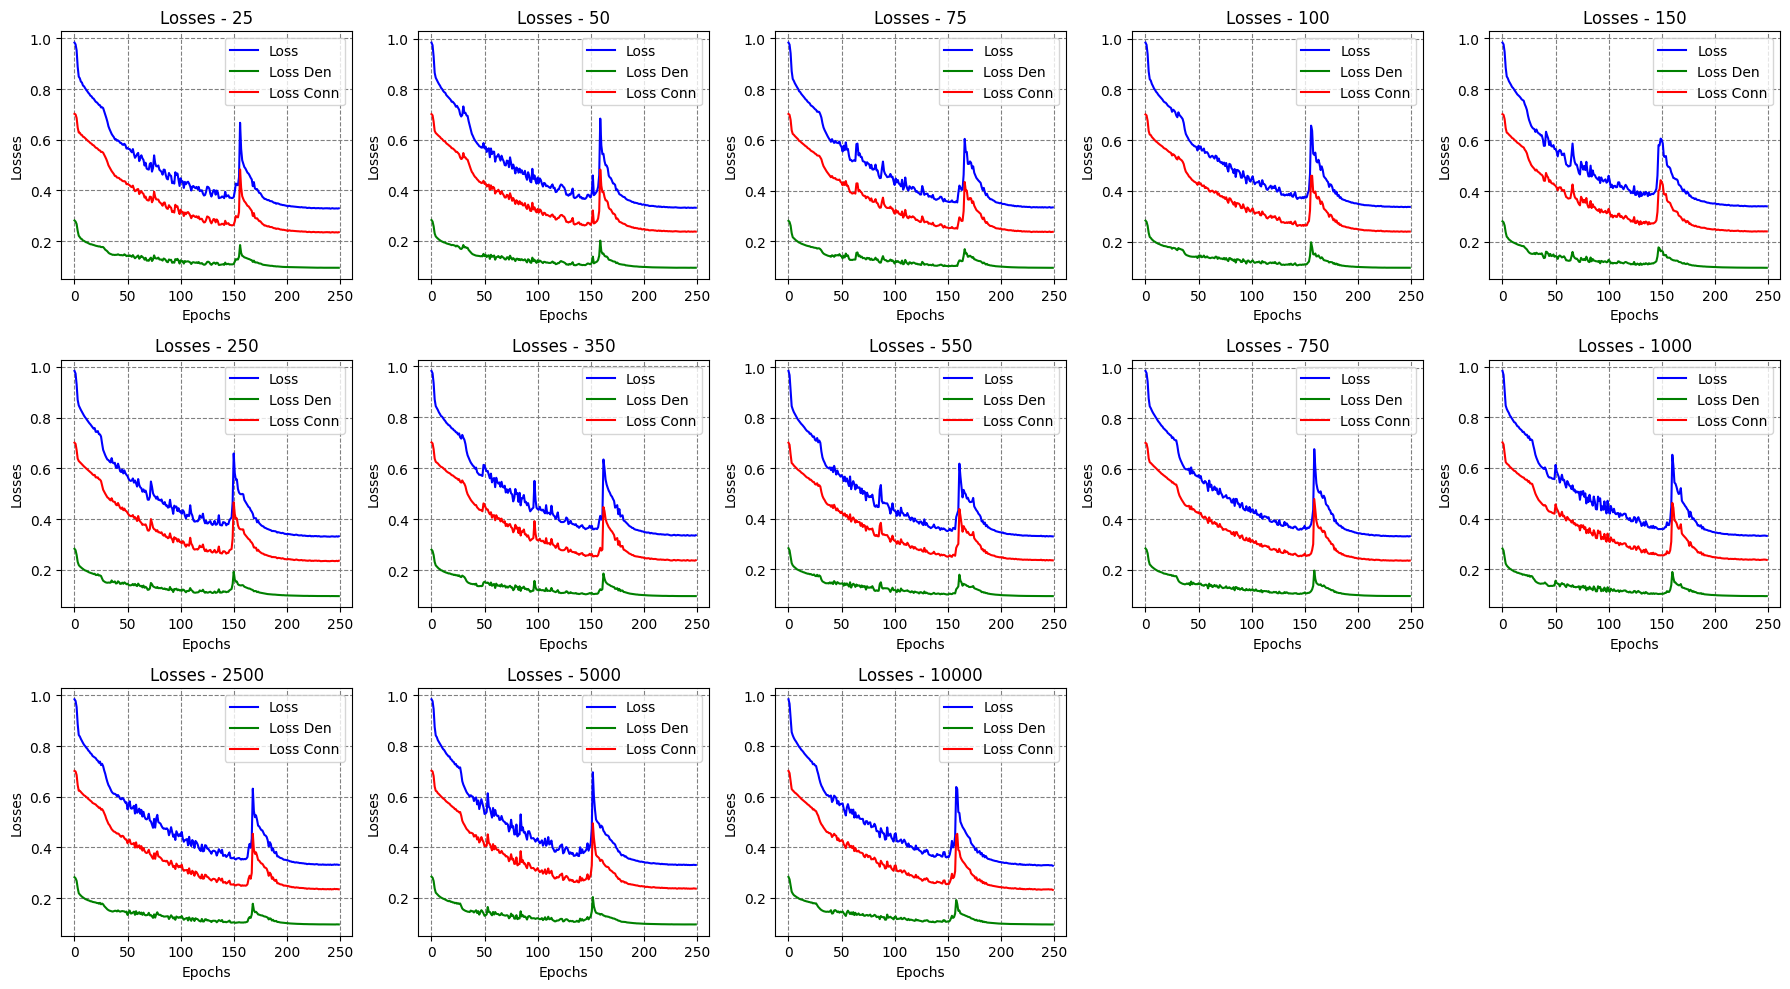

In [19]:
dataset_folder = '/kaggle/input/mlmod7/7mod/'

subfolders = [f.path for f in os.scandir(dataset_folder) if f.is_dir()]

def extract_number(folder_name):
    match = re.search(r's(\d+)', folder_name)
    if match:
        return int(match.group(1))
    return float('inf')  

subfolders_sorted = sorted(subfolders, key=lambda x: extract_number(x))

fig, axes = plt.subplots(3, 5, figsize=(18, 10))

axes = axes.flatten()

for i, folder in enumerate(subfolders_sorted):
    csv_files = [os.path.join(folder, file) for file in os.listdir(folder) if file.endswith('.csv')]
    
    if csv_files:
        df = pd.read_csv(csv_files[0])
        
        axes[i].plot(df['epoch'], df['loss'], label='Loss', color='blue')
        axes[i].plot(df['epoch'], df['loss_den'], label='Loss Den', color='green')
        axes[i].plot(df['epoch'], df['loss_conn'], label='Loss Conn', color='red')

        axes[i].set_title(f"Losses - {folder.split('/')[-1][1:]}")
        axes[i].set_xlabel('Epochs')
        axes[i].set_ylabel('Losses')
        axes[i].legend()
        axes[i].grid(True, linestyle='--', color='gray')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.savefig('losses_mod7_all.png', dpi=300)
plt.tight_layout()
plt.show()


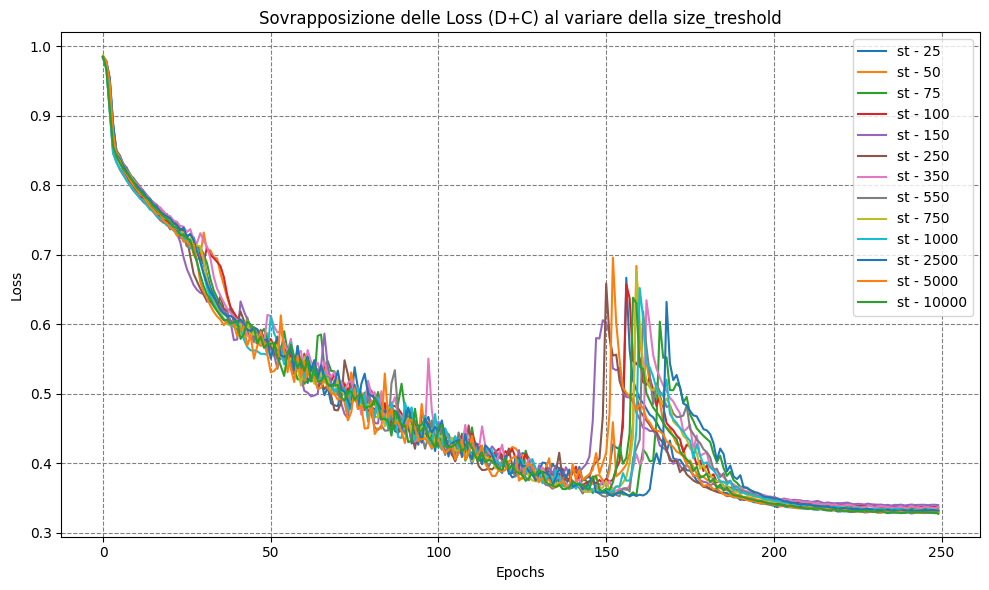

In [20]:
dataset_folder = '/kaggle/input/mlmod7/7mod/'
subfolders = [f.path for f in os.scandir(dataset_folder) if f.is_dir()]

subfolders_sorted = sorted(subfolders, key=lambda x: extract_number(x))

loss_at_250_epochs = []
labels = []

plt.figure(figsize=(10, 6))

for folder in subfolders_sorted:
    csv_files = [os.path.join(folder, file) for file in os.listdir(folder) if file.endswith('.csv')]
    
    if csv_files:
        df = pd.read_csv(csv_files[0])
        if len(df) > 250:
            loss_at_250 = df['loss'].iloc[250]
        else:
            #TANTO SONO 249
            loss_at_250 = df['loss'].iloc[-1]
        
        loss_at_250_epochs.append(loss_at_250)
        labels.append(folder.split('/')[-1][1:])
        
        plt.plot(df['epoch'], df['loss'], label=f"st - {labels[-1]}")

plt.title("Sovrapposizione delle Loss (D+C) al variare della size_treshold")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', color='gray')

plt.savefig('losses_sovra_plot.png', dpi=300)
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/2800574610.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels))


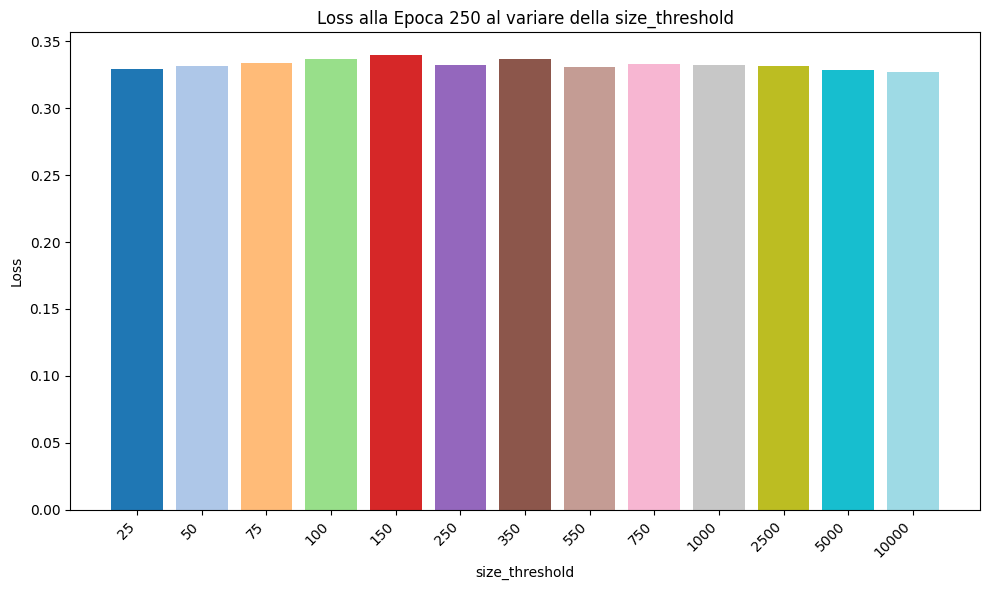

In [21]:
colors = plt.cm.get_cmap('tab20', len(labels))

plt.figure(figsize=(10, 6))

bars = plt.bar(labels, loss_at_250_epochs, color=colors(range(len(labels))))

plt.title("Loss alla Epoca 250 al variare della size_threshold")
plt.xlabel('size_threshold')
plt.ylabel('Loss')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('loss_at_250_epochs_bar_plot.png', dpi=300)
plt.show()